In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
news = pd.read_csv('../Data/news_classification_Feb29_24.csv')
test = pd.read_csv('../Data/test_set_Feb29_2024.csv')

In [6]:
X_train, X_val, y_train, y_val = train_test_split(news.text, news.label, test_size=0.1, random_state=42, stratify=news.label)
X_test = test.text
y_test = test.label

In [7]:
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
X_train = model.encode(X_train.tolist())
X_val = model.encode(X_val.tolist())
X_test = model.encode(X_test.tolist())


KeyboardInterrupt



In [23]:
# initiate the model
lr_classifier = LogisticRegression()
# fit the model
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_val_pred = lr_classifier.predict(X_val)
accuracy_val = metrics.accuracy_score(y_val, y_val_pred)
accuracy_val

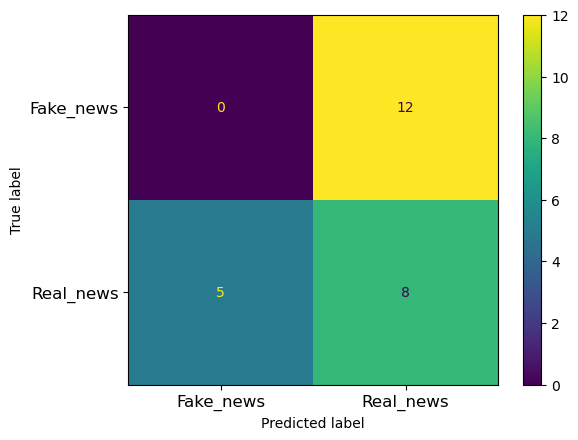

In [26]:
cm = metrics.confusion_matrix(y_val, y_val_pred, labels = lr_classifier.classes_)
fig, ax = plt.subplots()
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Fake_news', 'Real_news'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)
ax.set_yticklabels(labels = ['Fake_news', 'Real_news'], fontsize = 12)

display_cm.plot(ax = ax)
plt.show()